# Radiology Detail Auxiliary Analysis

In this file we will execute an exploratory analysis of the data at a surface level

## Process

1. Read in the data
2. Observe the data 
3. Clean the data 
4. Perform a surface level analysis of the data
5. brief text analysis

In [5]:
# import and install if not already done
!pip install pandas
import pandas as pd 

radiology_detail_df = pd.read_csv("radiology_detail.csv")
radiology_detail_df.head(3)

,note_id,subject_id,field_name,field_value,field_ordinal
0,10000032-RR-14,10000032,exam_code,C11,1
1,10000032-RR-14,10000032,exam_name,CHEST (PA & LAT),1
2,10000032-RR-15,10000032,exam_code,U314,1


In [6]:
rows, cols = radiology_detail_df.shape
print(f"The dataset contains {rows} rows and {cols} columns")

The dataset contains 6046121 rows and 5 columns


# Data Types

In [7]:
data_types = radiology_detail_df.dtypes
print("The data types of each attribute is:")
print(data_types)

The data types of each attribute is:
note_id          object
subject_id        int64
field_name       object
field_value      object
field_ordinal     int64
dtype: object


# Data Analysis

Checking for inconsistencies, missing values, limitations or biases associated with the data
identified at this early stage. 

In [11]:
# check the data frame for any rows with missing values
missing_rows = radiology_detail_df.isna().sum(axis=1)
num_rows_with_missing_values = (missing_rows > 0).sum()
print(f"The number of rows with missing values: {num_rows_with_missing_values}")

The number of rows with missing values: 0


## Observation

There does not seem to be any data missing from this data set. 
All the values are accounted for in each row and column. 

**Duplicate Data**
Now we check for duplicate data

In [12]:
# Check for duplicate rows
duplicate_rows = radiology_detail_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_rows}")

Number of duplicated rows: 0


## Observation

There does not seem to be any duplicated data in the dataset. 
All the value are unique for each row.

In [4]:
fields_of_interest = radiology_detail_df[['field_name', 'field_value', 'field_ordinal']]
fields_of_interest.head(5)

,field_name,field_value,field_ordinal
0,exam_code,C11,1
1,exam_name,CHEST (PA & LAT),1
2,exam_code,U314,1
3,exam_code,U644,3
4,exam_code,W82,2


In [5]:
value_counts = fields_of_interest['field_value'].value_counts().reset_index()
value_counts.columns = ['Field Value', 'Frequency']
value_counts[:10]

,Field Value,Frequency
0,CHEST (PORTABLE AP),334955
1,C12,334955
2,C11,280102
3,CHEST (PA & LAT),280102
4,Q111,121765
5,CT HEAD W/O CONTRAST,121765
6,Q4432,73838
7,CT ABD & PELVIS WITH CONTRAST,73838
8,CHEST PORT. LINE PLACEMENT,56393
9,C91,56393


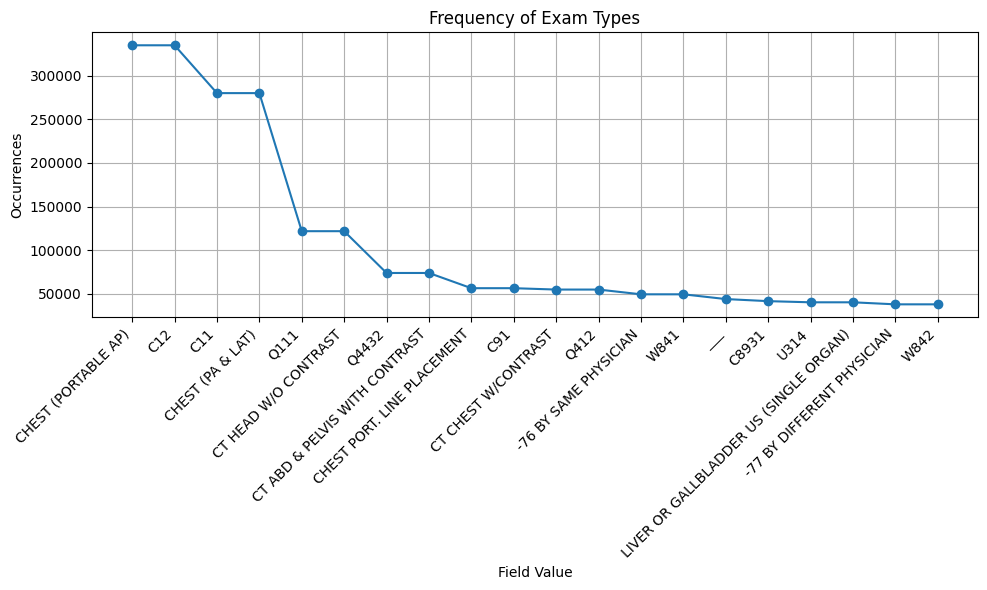

In [6]:
# sorting by frequency for line graph
value_counts = value_counts.sort_values(by="Frequency", ascending=False)

value_counts_top20 = value_counts.head(20)

# create graph using matplot
!pip install matplotlib 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(value_counts_top20['Field Value'], value_counts_top20['Frequency'], marker="o", linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Field Value")
plt.ylabel("Occurrences")
plt.title("Frequency of Exam Types")
plt.grid(True)
plt.tight_layout()
plt.show()